In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if '.csv' in filename:
            print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels

import scipy.stats as stats


In [3]:
asteroids = pd.read_csv('./nasa.csv',delimiter=',')
# df1 = pd.read_csv('/kaggle/input/nasa.csv', delimiter=',', nrows = nRowsRead)

asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
def plotHistogram(variableName, yLabel='Count', xLabel = 'Variable', title = 'Histogram', secondVar = None, legendLabel=None):
    # Plot Settings
    fig, ax = plt.subplots(figsize = (10,7))
    ax.set_title(title, size = 20)
    ax.set_ylabel(yLabel, size = 16)
    ax.set_xlabel(xLabel, size = 16)
    
    # show gridlines for easier reading
    plt.grid(True)
    
    # enable the ability to plot two variables on top of each other
    if secondVar is None:
        variableName.hist(color="darkslategray")
    else:
        variableName.hist(color="steelblue", alpha=0.5)
        secondVar.hist(color="chocolate", alpha=0.5)
        
    if legendLabel is None:
        pass
    else:
        plt.legend(legendLabel)
    
    ax.set_facecolor("lightgrey")

    plt.show()

In [5]:
def plotScatter(xVar, yVar, xLabel = 'x', yLabel='y', title = 'Scatter', alpha=1):
    # Plot Settings
    fig, ax = plt.subplots(figsize = (10,7))
    ax.set_title(title, size = 20)
    ax.set_ylabel(yLabel, size = 16)
    ax.set_xlabel(xLabel, size = 16)
    
    # show gridlines for easier reading
    plt.grid(True)
    
    plt.scatter(xVar, yVar, color="darkslategray", alpha=alpha)
    ax.set_facecolor("lightgrey")

    plt.show()

In [6]:
from pandas.core.algorithms import value_counts
from pandas.core.reshape.concat import concat

def summarize_category(series):
        res_regu = value_counts(series)
        res_norm = value_counts(series, normalize=True)
        result = concat([res_regu, res_norm], axis=1, keys=['Count', 'Frequency'])
        result = result.sort_index()
        return result

In [7]:
def conditional_probability(df, target, givens, cell="Neo Reference ID"):
   
    if isinstance(givens, str):
        givens = [givens]
    print(f"P({target}|{', '.join(givens)})")
    columns = [target] + givens
    # handling multiple targets would require a more sophisticated join.
    result = (df.groupby(columns).count() / df.groupby(givens).count())[cell]
    # this makes sure the target is always the column
    result = result.reorder_levels(givens + [target]).sort_index()
    # this flattens the hiearchical index and should fill in missing values.
    result = result.unstack(fill_value=0.0)
    return pd.DataFrame(result)

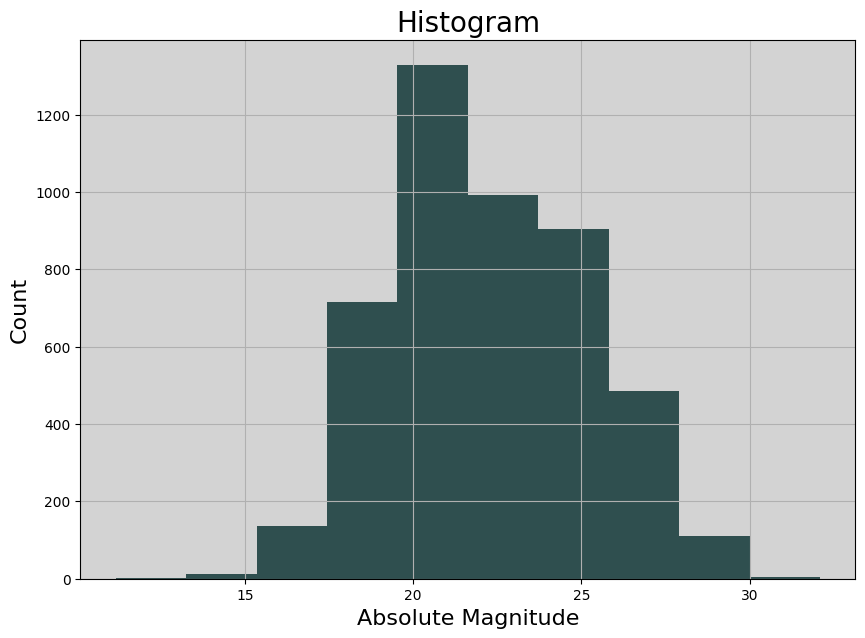

In [8]:
plotHistogram(asteroids['Absolute Magnitude'], xLabel = 'Absolute Magnitude')

In [9]:
asteroids['Grouped Absolute Mag'] = (asteroids['Absolute Magnitude']// 3)*3
conditional_probability(asteroids, 'Hazardous', 'Grouped Absolute Mag', cell="Neo Reference ID")

P(Hazardous|Grouped Absolute Mag)


Hazardous,False,True
Grouped Absolute Mag,,
9.0,1.000000,0.000000
12.0,0.714286,0.285714
15.0,0.740741,0.259259
18.0,0.703311,0.296689
21.0,0.838207,0.161793
24.0,1.000000,0.000000
27.0,1.000000,0.000000
30.0,1.000000,0.000000


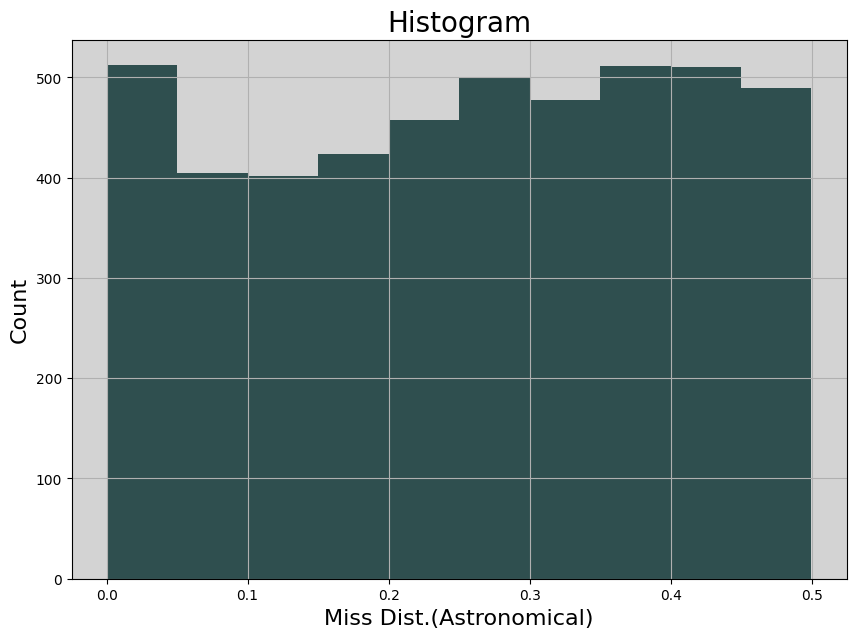

In [10]:
histVar = 'Miss Dist.(Astronomical)'
plotHistogram(asteroids[histVar], xLabel = histVar)

In [11]:
summarize_category(asteroids['Hazardous'])

/var/folders/8d/7_05mzp128g3hjzdj4p5d05h0000gn/T/ipykernel_52696/314157390.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  res_regu = value_counts(series)
/var/folders/8d/7_05mzp128g3hjzdj4p5d05h0000gn/T/ipykernel_52696/314157390.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  res_norm = value_counts(series, normalize=True)


,Count,Frequency
Hazardous,,
False,3932,0.838916
True,755,0.161084


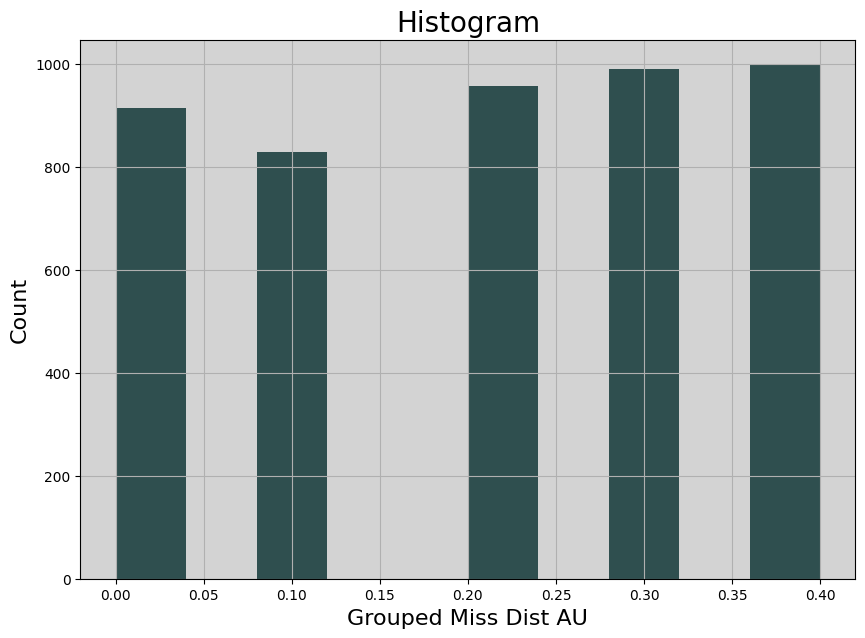

In [12]:
asteroids['Grouped Miss Dist AU'] = (asteroids['Miss Dist.(Astronomical)'] // 0.1) * 0.1

histVar = 'Grouped Miss Dist AU'
plotHistogram(asteroids[histVar], xLabel = histVar)

In [13]:
conditional_probability(asteroids, 'Hazardous', 'Grouped Miss Dist AU', cell="Neo Reference ID")

P(Hazardous|Grouped Miss Dist AU)


Hazardous,False,True
Grouped Miss Dist AU,,
0.0,0.854645,0.145355
0.1,0.845411,0.154589
0.2,0.834901,0.165099
0.3,0.841414,0.158586
0.4,0.820461,0.179539


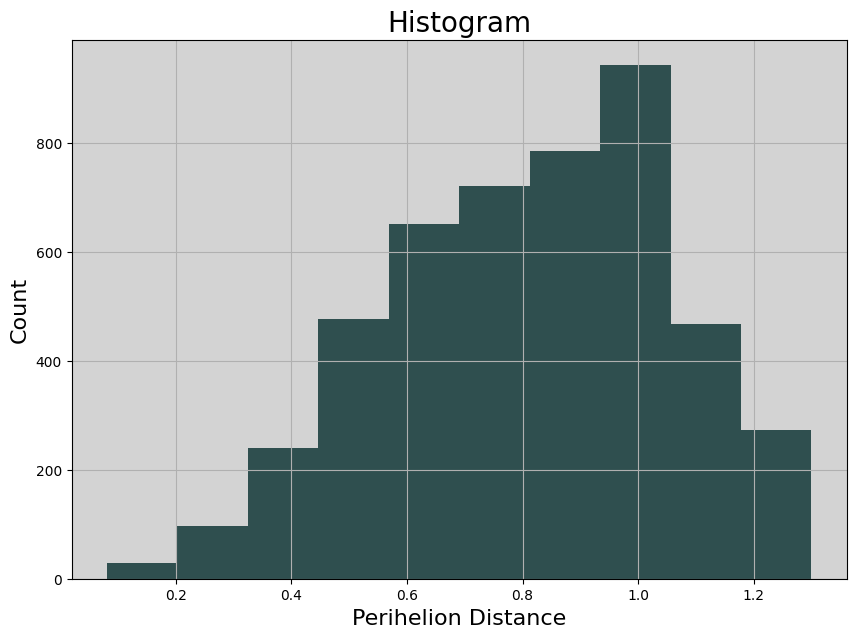

In [14]:
histVar = 'Perihelion Distance'
plotHistogram(asteroids[histVar], xLabel = histVar)

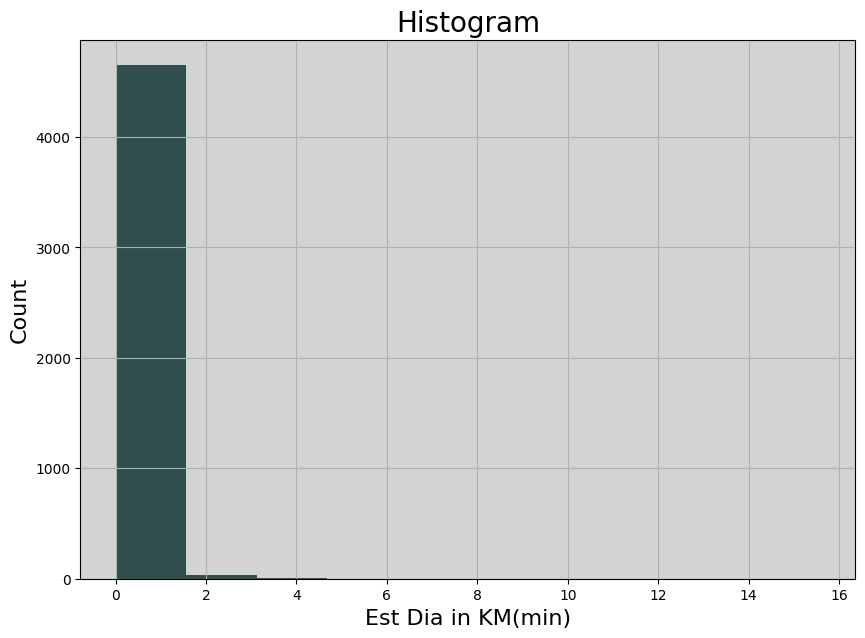

In [15]:
histVar = 'Est Dia in KM(min)'
plotHistogram(asteroids[histVar], xLabel = histVar)

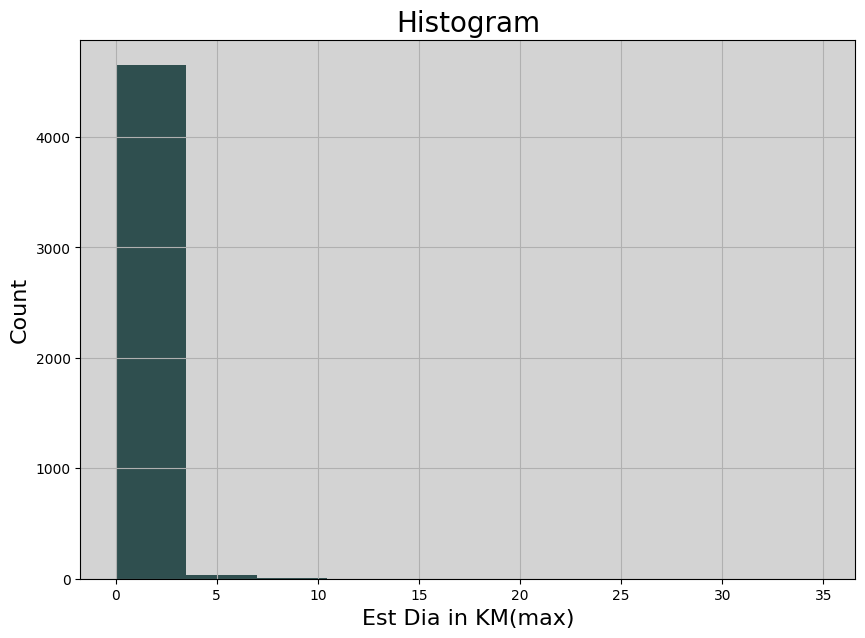

In [16]:
histVar = 'Est Dia in KM(max)'
plotHistogram(asteroids[histVar], xLabel = histVar)

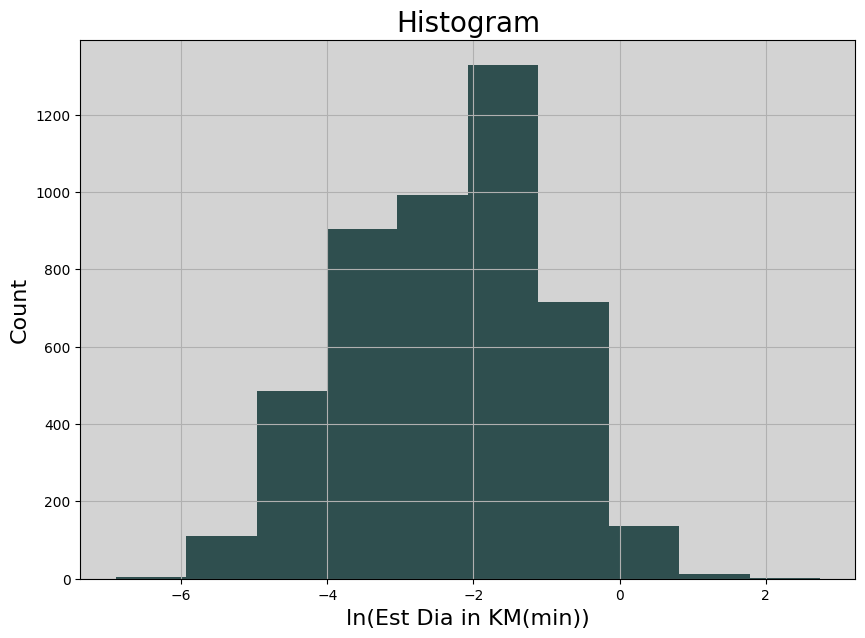

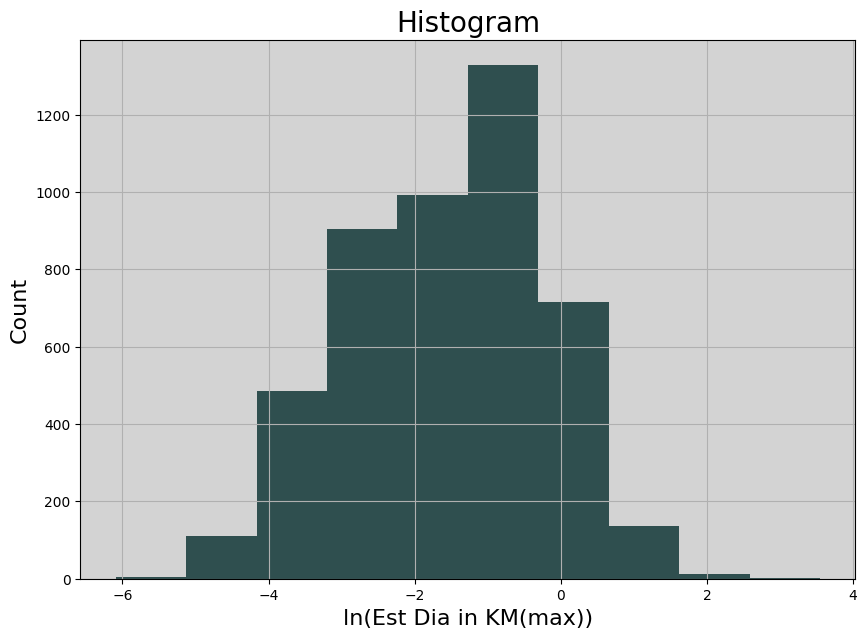

In [17]:
histVar = 'ln(Est Dia in KM(min))'
plotHistogram(np.log(asteroids['Est Dia in KM(min)']), xLabel = histVar)

histVar = 'ln(Est Dia in KM(max))'
plotHistogram(np.log(asteroids['Est Dia in KM(max)']), xLabel = histVar)

In [18]:
asteroids['Grouped Est Dia in KM max'] = (np.log(asteroids['Est Dia in KM(max)'])// 1)
conditional_probability(asteroids, 'Hazardous', 'Grouped Est Dia in KM max', cell="Neo Reference ID")

P(Hazardous|Grouped Est Dia in KM max)


Hazardous,False,True
Grouped Est Dia in KM max,,
-7.0,1.000000,0.000000
-6.0,1.000000,0.000000
-5.0,1.000000,0.000000
-4.0,1.000000,0.000000
-3.0,1.000000,0.000000
-2.0,0.806368,0.193632
-1.0,0.694509,0.305491
0.0,0.724062,0.275938
1.0,0.862069,0.137931


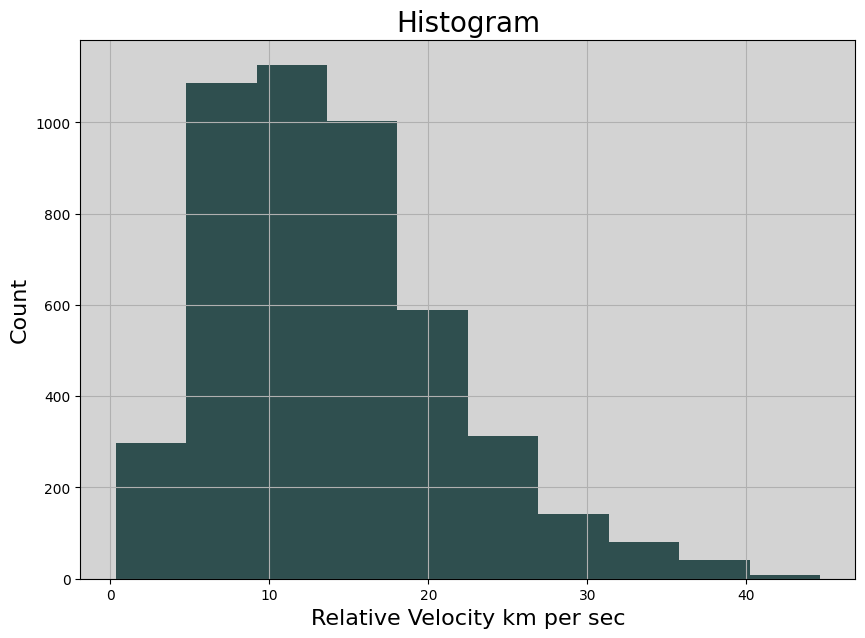

In [19]:
histVar = 'Relative Velocity km per sec'
plotHistogram(asteroids[histVar], xLabel = histVar)

In [20]:
asteroids['Grouped Relative Velocity'] = (asteroids['Relative Velocity km per sec'] // 10) * 10

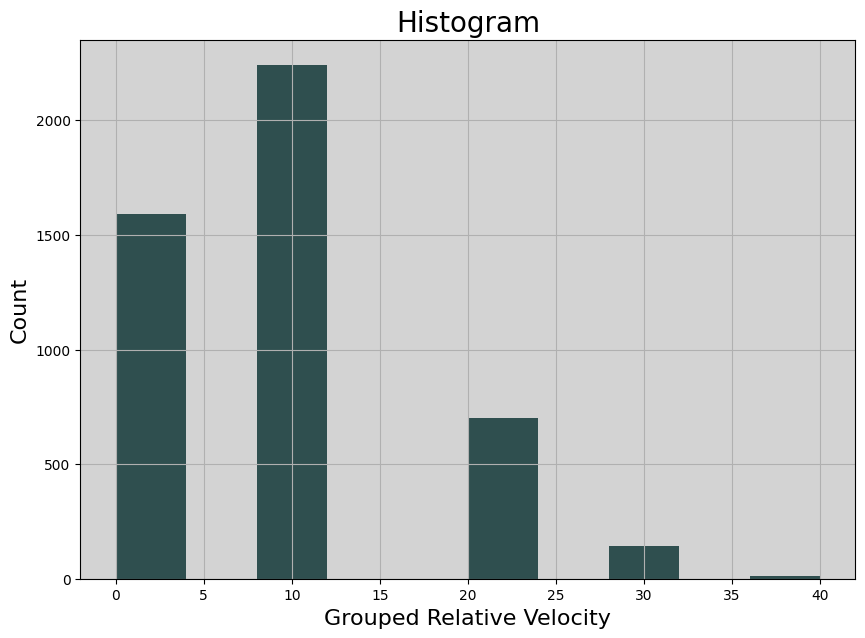

In [21]:
histVar = 'Grouped Relative Velocity'
plotHistogram(asteroids[histVar], xLabel = histVar)

In [22]:
conditional_probability(asteroids, 'Hazardous', 'Grouped Relative Velocity', cell="Neo Reference ID")

P(Hazardous|Grouped Relative Velocity)


Hazardous,False,True
Grouped Relative Velocity,,
0.0,0.916981,0.083019
10.0,0.825000,0.175000
20.0,0.747504,0.252496
30.0,0.666667,0.333333
40.0,0.500000,0.500000


In [23]:
summarize_category(asteroids['Orbiting Body'])

/var/folders/8d/7_05mzp128g3hjzdj4p5d05h0000gn/T/ipykernel_52696/314157390.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  res_regu = value_counts(series)
/var/folders/8d/7_05mzp128g3hjzdj4p5d05h0000gn/T/ipykernel_52696/314157390.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  res_norm = value_counts(series, normalize=True)


,Count,Frequency
Orbiting Body,,
Earth,4687,1.0


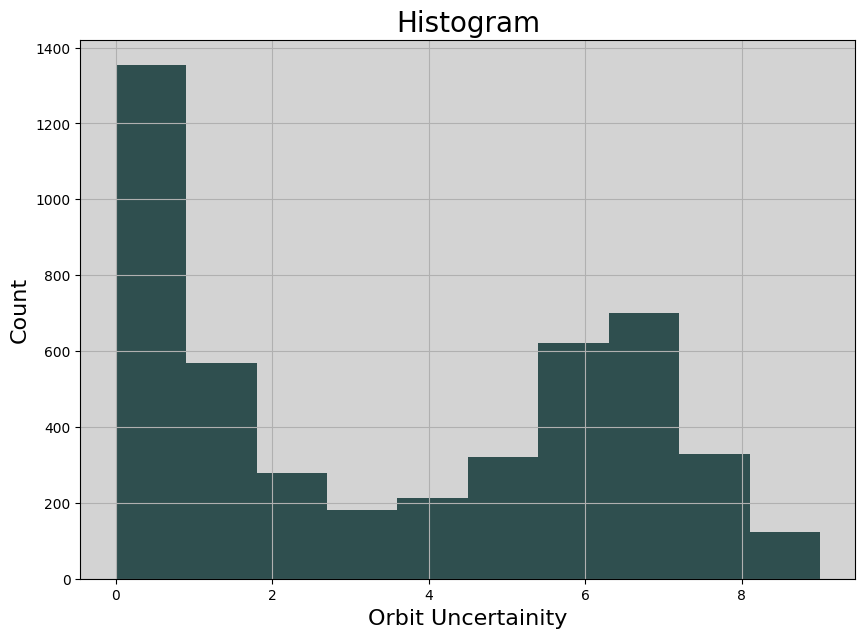

In [24]:
histVar = 'Orbit Uncertainity'
plotHistogram(asteroids[histVar], xLabel = histVar)

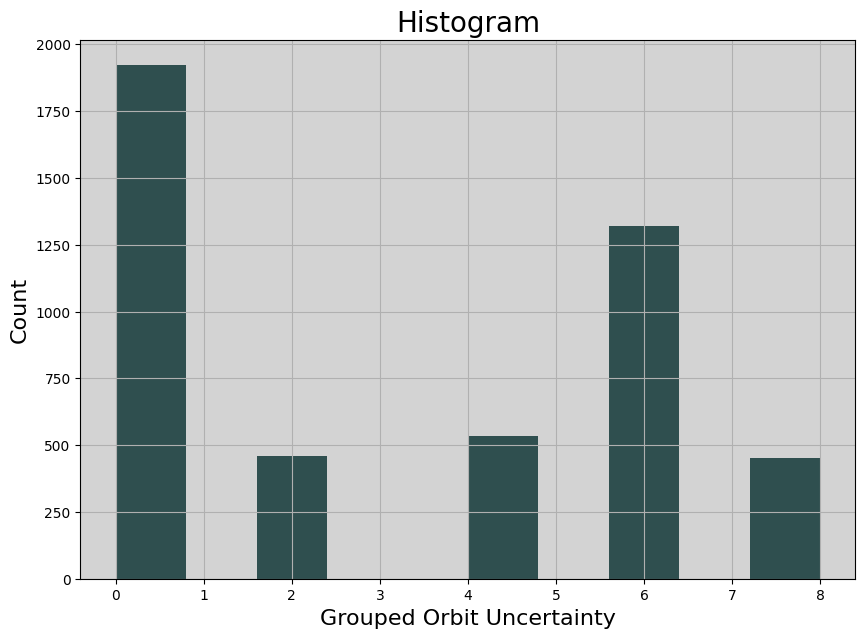

In [25]:
asteroids['Grouped Orbit Uncertainty'] = (asteroids['Orbit Uncertainity'] // 2) * 2

histVar = 'Grouped Orbit Uncertainty'
plotHistogram(asteroids[histVar], xLabel = histVar)

In [26]:
conditional_probability(asteroids, 'Hazardous', 'Grouped Orbit Uncertainty', cell="Neo Reference ID")

P(Hazardous|Grouped Orbit Uncertainty)


Hazardous,False,True
Grouped Orbit Uncertainty,,
0,0.701197,0.298803
2,0.815618,0.184382
4,0.923077,0.076923
6,0.968182,0.031818
8,0.971239,0.028761


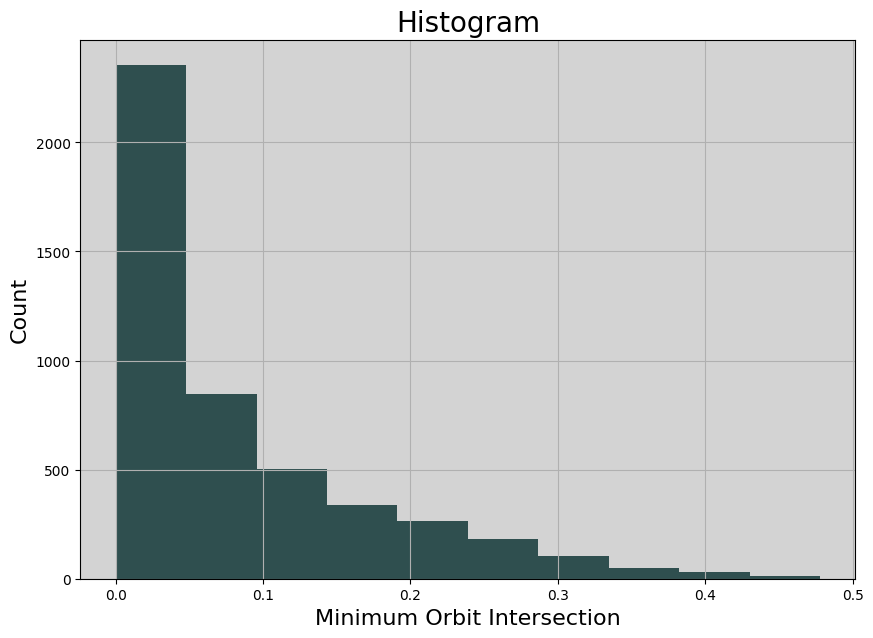

In [27]:
histVar = 'Minimum Orbit Intersection'
plotHistogram(asteroids[histVar], xLabel = histVar)

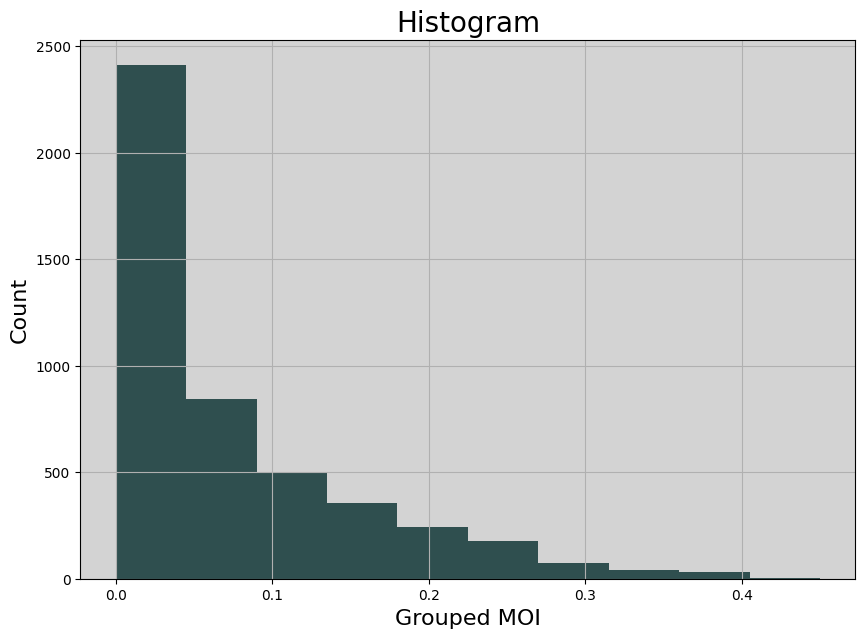

In [28]:
asteroids['Grouped MOI'] = (asteroids['Minimum Orbit Intersection'] // 0.05) * 0.05

histVar = 'Grouped MOI'
plotHistogram(asteroids[histVar], xLabel = histVar)

In [29]:
conditional_probability(asteroids, 'Hazardous', 'Grouped MOI', cell="Neo Reference ID")

P(Hazardous|Grouped MOI)


Hazardous,False,True
Grouped MOI,,
0.00,0.686592,0.313408
0.05,1.000000,0.000000
0.10,1.000000,0.000000
0.15,1.000000,0.000000
0.20,1.000000,0.000000
0.25,1.000000,0.000000
0.30,1.000000,0.000000
0.35,1.000000,0.000000
0.40,1.000000,0.000000


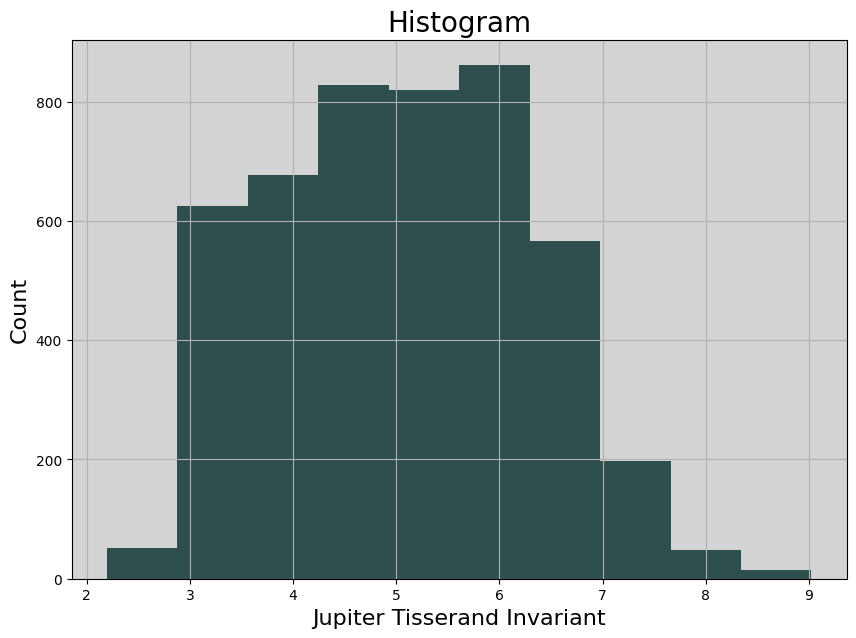

In [30]:
histVar = 'Jupiter Tisserand Invariant'
plotHistogram(asteroids[histVar], xLabel = histVar)

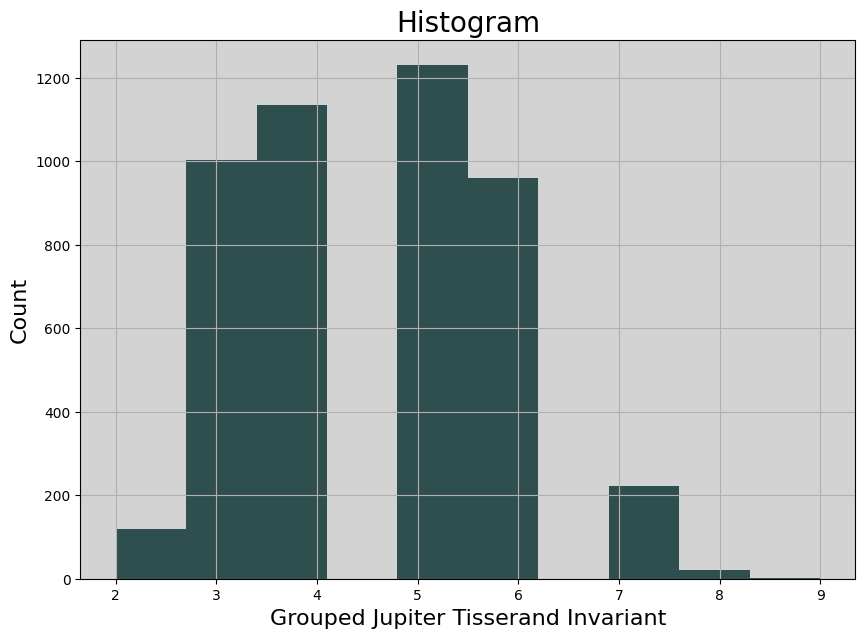

In [31]:
asteroids['Grouped Jupiter Tisserand Invariant'] = (asteroids['Jupiter Tisserand Invariant'] // 1)
histVar = 'Grouped Jupiter Tisserand Invariant'
plotHistogram(asteroids[histVar], xLabel = histVar)

In [32]:
conditional_probability(asteroids, 'Hazardous', 'Grouped Jupiter Tisserand Invariant', cell="Neo Reference ID")

P(Hazardous|Grouped Jupiter Tisserand Invariant)


Hazardous,False,True
Grouped Jupiter Tisserand Invariant,,
2.0,0.796610,0.203390
3.0,0.845309,0.154691
4.0,0.847577,0.152423
5.0,0.818552,0.181448
6.0,0.866528,0.133472
7.0,0.796380,0.203620
8.0,0.681818,0.318182
9.0,1.000000,0.000000


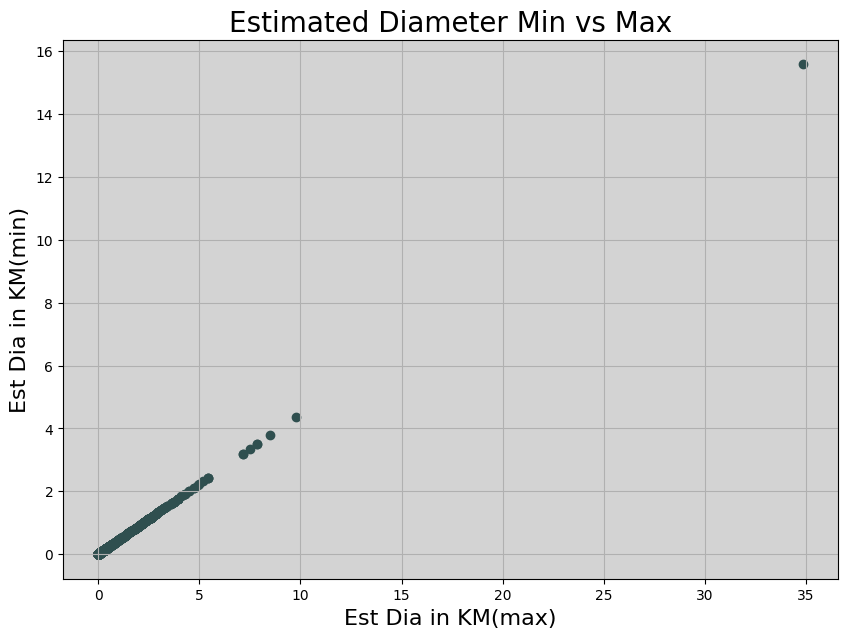

In [33]:
plotScatter(asteroids['Est Dia in KM(max)'], asteroids['Est Dia in KM(min)'], xLabel = 'Est Dia in KM(max)', yLabel='Est Dia in KM(min)', title = 'Estimated Diameter Min vs Max')

In [34]:
print("r   = ", stats.pearsonr( asteroids['Est Dia in KM(max)'], asteroids['Est Dia in KM(min)'])[0])
print("rho = ", stats.spearmanr( asteroids['Est Dia in KM(max)'], asteroids['Est Dia in KM(min)'])[0])

r   =  0.9999999999999925
rho =  1.0


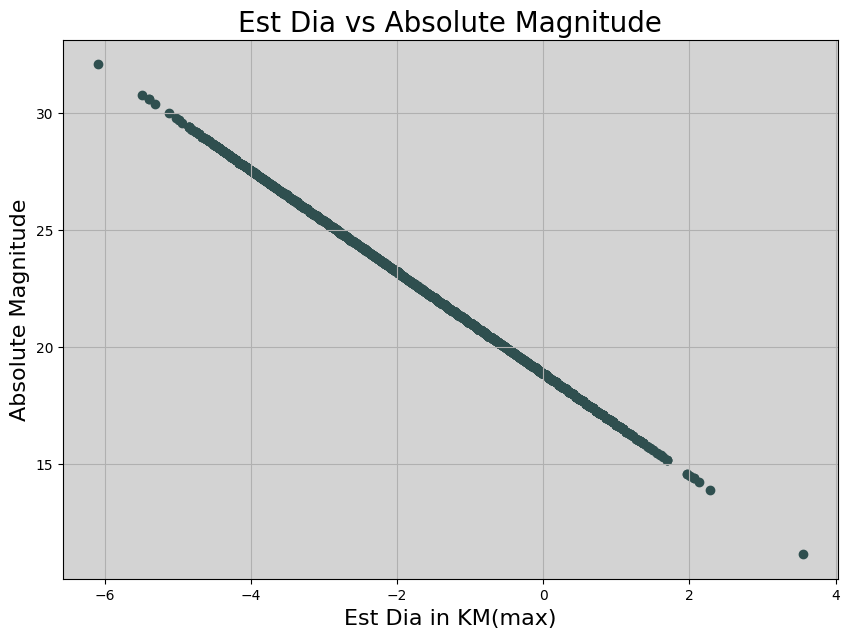

In [35]:
plotScatter(np.log(asteroids['Est Dia in KM(max)']), asteroids['Absolute Magnitude'], xLabel = 'Est Dia in KM(max)', yLabel='Absolute Magnitude', title = 'Est Dia vs Absolute Magnitude')

In [36]:
print('Explicit Comparison:')
print("r   = ", stats.pearsonr( asteroids['Est Dia in KM(max)'], asteroids['Absolute Magnitude'])[0])
print("rho = ", stats.spearmanr( asteroids['Est Dia in KM(max)'], asteroids['Absolute Magnitude'])[0])

print('\nAccounting for Log Transformation:')
print("r   = ", stats.pearsonr( np.log(asteroids['Est Dia in KM(max)']), asteroids['Absolute Magnitude'])[0])
print("rho = ", stats.spearmanr( np.log(asteroids['Est Dia in KM(max)']), asteroids['Absolute Magnitude'])[0])

Explicit Comparison:
r   =  -0.6134815101560811
rho =  -1.0

Accounting for Log Transformation:
r   =  -1.0
rho =  -1.0


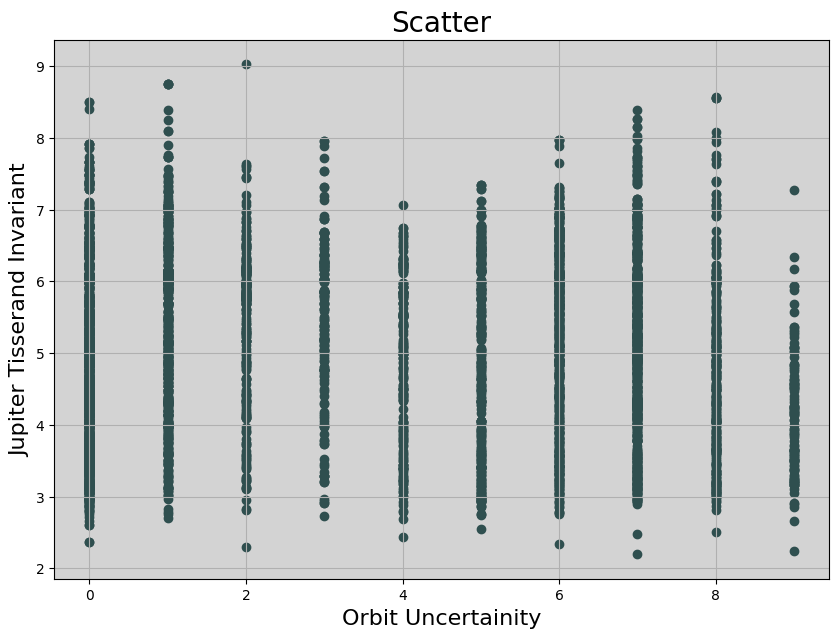

In [37]:
plotScatter(asteroids['Orbit Uncertainity'], asteroids['Jupiter Tisserand Invariant'], xLabel = 'Orbit Uncertainity', yLabel='Jupiter Tisserand Invariant', title = 'Scatter')

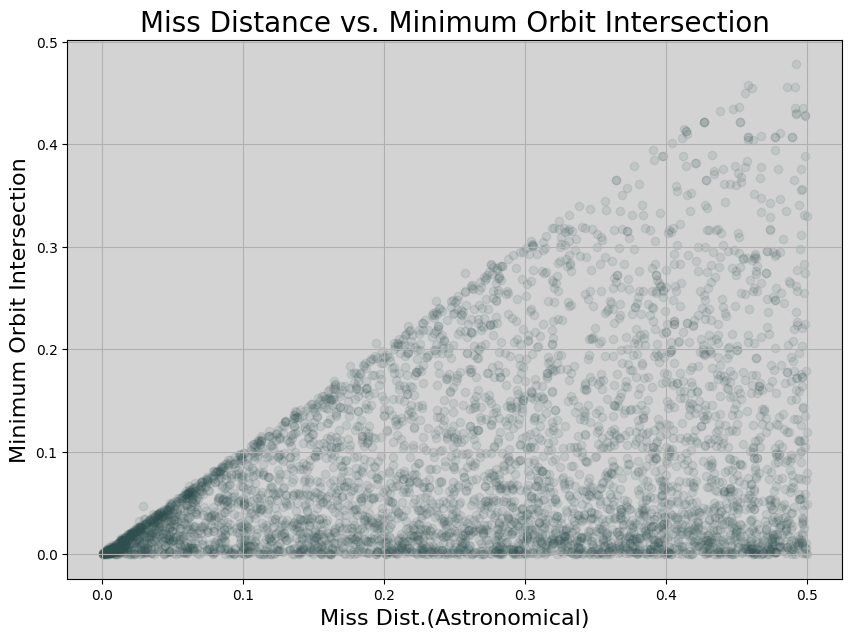

In [38]:
plotScatter(asteroids['Miss Dist.(Astronomical)'], asteroids['Minimum Orbit Intersection'], xLabel = 'Miss Dist.(Astronomical)', yLabel='Minimum Orbit Intersection', title = 'Miss Distance vs. Minimum Orbit Intersection', alpha=0.1)

In [39]:
print("r   = ", stats.pearsonr( asteroids['Minimum Orbit Intersection'], asteroids['Miss Dist.(Astronomical)'])[0])
print("rho = ", stats.spearmanr( asteroids['Minimum Orbit Intersection'], asteroids['Miss Dist.(Astronomical)'])[0])

r   =  0.3519807993660249
rho =  0.2968711280830672


In [40]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils.multiclass import unique_labels

In [41]:
asteroids_array = asteroids[['Absolute Magnitude', 'Relative Velocity km per sec', 'Orbit Uncertainity', 'Jupiter Tisserand Invariant','Minimum Orbit Intersection', 'Hazardous']].values

X = asteroids_array[:,0:5]
X = X.astype('float64')
Y = asteroids_array[:,5]
Y = Y.astype('bool')


validation_size = 0.20
seed = 7
scoring = 'accuracy'

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [42]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.893571 (0.016153)
NB: 0.963724 (0.007559)
KNN: 0.836755 (0.012961)
CART: 0.995999 (0.002732)
LDA: 0.903974 (0.021499)
SVM: 0.842889 (0.019776)


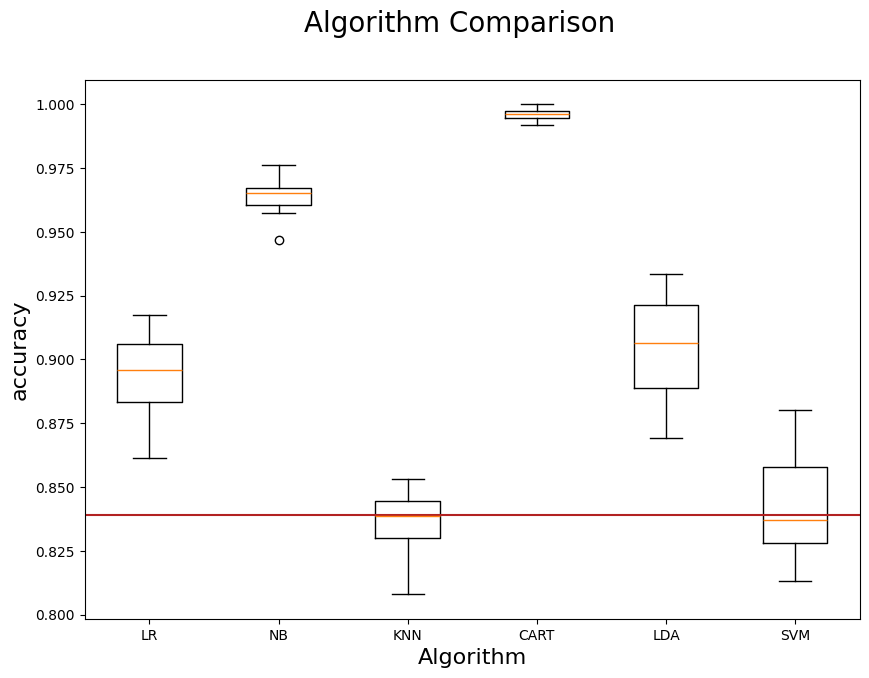

In [43]:
fig = plt.figure(figsize = (10,7))
fig.suptitle('Algorithm Comparison', size = 20)
ax = fig.add_subplot(111)
ax.set_ylabel(scoring, size = 16)
ax.set_xlabel('Algorithm', size = 16)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.axhline(y = 0.838916, color = 'firebrick', linestyle = '-')
plt.show()

In [44]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9968017057569296
[[778   1]
 [  2 157]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       779
        True       0.99      0.99      0.99       159

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



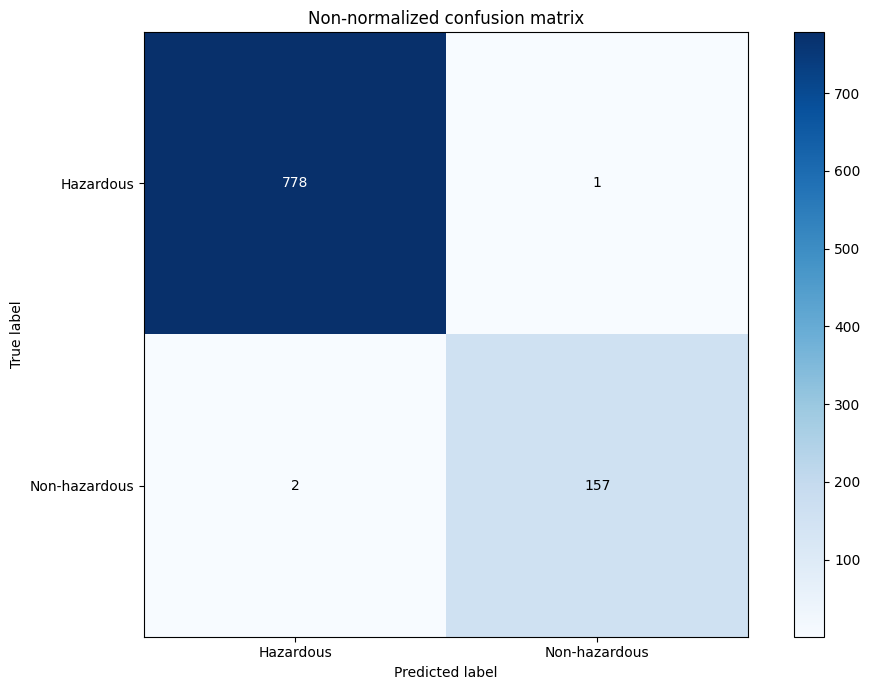

In [45]:
#plot non normalized confusion matrix
cmap = plt.cm.Blues
cm = confusion_matrix(Y_validation, predictions)
# add this line for normalized confusion:
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes = ['Hazardous', 'Non-hazardous']
title = 'Non-normalized confusion matrix'
fmt = 'd' #make this .2f for normalize

fig, ax = plt.subplots(figsize = (10,7))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

plt.show()

In [46]:
print('Tree Depth:', cart.get_depth())
print('Number of Tree Leaves:', cart.get_n_leaves())
print('All Parameters:', cart.get_params())
# print('Tree parameters:', cart.get_params())

Tree Depth: 7
Number of Tree Leaves: 14
All Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


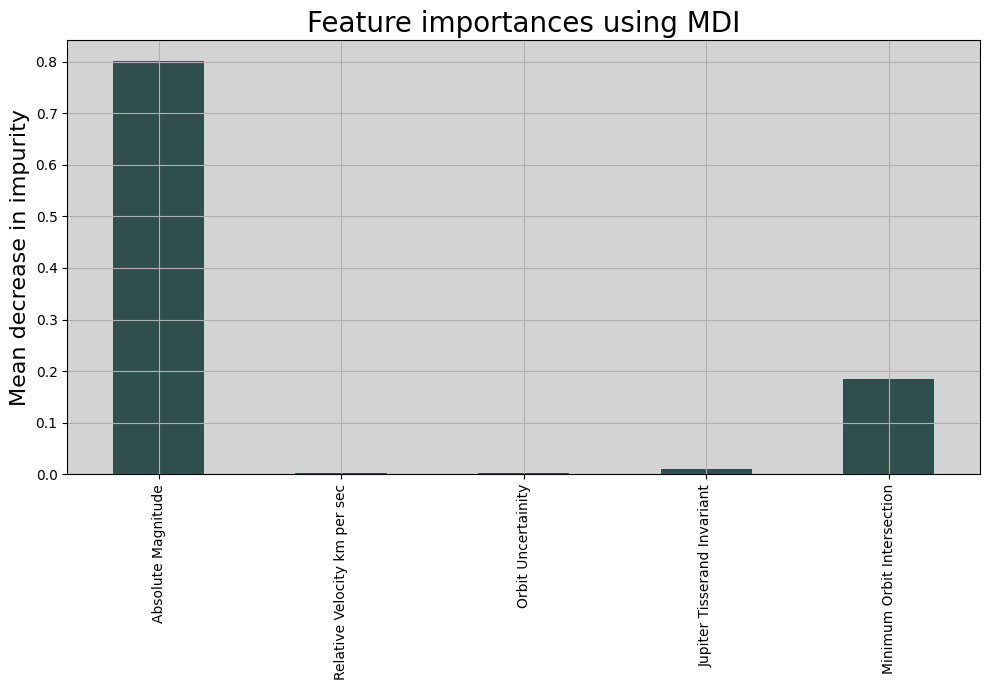

In [47]:
importances = cart.feature_importances_
# std = np.std([tree.feature_importances_ for tree in cart.feature_names_in_], axis=0)

feature_names = ['Absolute Magnitude', 'Relative Velocity km per sec', 'Orbit Uncertainity', 'Jupiter Tisserand Invariant','Minimum Orbit Intersection']
cart_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (10,7))
cart_importances.plot.bar(ax=ax, color="darkslategray")
ax.set_title("Feature importances using MDI", size=20)
ax.set_ylabel("Mean decrease in impurity", size=16)
ax.set_facecolor("lightgrey")
plt.grid(True)


fig.tight_layout()

In [48]:
# every feature that isn't a date, repeated value, ID/name, or previously noted as constant.
allFeatures = ['Absolute Magnitude',
'Est Dia in KM(min)',
'Est Dia in KM(max)',
'Relative Velocity km per sec',
'Miss Dist.(Astronomical)',
'Miss Dist.(kilometers)',
'Orbit Uncertainity',
'Minimum Orbit Intersection',
'Jupiter Tisserand Invariant',
'Epoch Osculation',
'Eccentricity',
'Semi Major Axis',
'Inclination',
'Asc Node Longitude',
'Orbital Period',
'Perihelion Distance',
'Perihelion Arg',
'Aphelion Dist',
'Perihelion Time',
'Mean Anomaly',
'Mean Motion',
'Equinox']

for thisFeat in allFeatures:    
    pear = stats.pearsonr( asteroids['Hazardous'], asteroids[thisFeat])[0]
    spear = stats.spearmanr( asteroids['Hazardous'], asteroids[thisFeat])[0]
    best = max(np.abs(pear),np.abs(spear))
    if best > 0.05:
        print(thisFeat, ': ', best)

Absolute Magnitude :  0.34013604886952953
Est Dia in KM(min) :  0.34013604886952953
Est Dia in KM(max) :  0.34013604886952953
Relative Velocity km per sec :  0.1919701798432191
Orbit Uncertainity :  0.328721342566243
Minimum Orbit Intersection :  0.28973221211349953
Eccentricity :  0.18326913192685956
Perihelion Distance :  0.20797761846041143
Aphelion Dist :  0.05229993044253242
Mean Anomaly :  0.05416363486369139


/var/folders/8d/7_05mzp128g3hjzdj4p5d05h0000gn/T/ipykernel_52696/3947165341.py:26: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pear = stats.pearsonr( asteroids['Hazardous'], asteroids[thisFeat])[0]
/var/folders/8d/7_05mzp128g3hjzdj4p5d05h0000gn/T/ipykernel_52696/3947165341.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spear = stats.spearmanr( asteroids['Hazardous'], asteroids[thisFeat])[0]


In [49]:
asteroids_array = asteroids[['Absolute Magnitude', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Perihelion Distance', 'Relative Velocity km per sec', 'Eccentricity', 'Mean Anomaly', 'Aphelion Dist','Hazardous']].values

X = asteroids_array[:,0:8]
X = X.astype('float64')
Y = asteroids_array[:,8]
Y = Y.astype('bool')

In [50]:
from sklearn.model_selection import GridSearchCV

# 8 max depth variations x 10 min sample variations requires 80 searches
gridPara = {'max_depth':[1,2,3,4,5,6,7,8], 
           'min_samples_split':[2,4,8,14,15,20,25,30,40,50]}

CART = GridSearchCV(DecisionTreeClassifier(), gridPara, cv=5)
CART.fit(X,Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 4, 8, 14, 15, 20, 25, 30, 40,
                                               50]})

In [51]:
gridResults = pd.DataFrame(CART.cv_results_)
gridResults = gridResults.sort_values('rank_test_score')
gridResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
70,0.008418,0.000666,0.000323,0.000005,8,2,"{'max_depth': 8, 'min_samples_split': 2}",0.998934,0.995736,0.997866,0.994664,1.0,0.997440,0.001979,1
71,0.008425,0.000646,0.000321,0.000007,8,4,"{'max_depth': 8, 'min_samples_split': 4}",0.997868,0.995736,0.997866,0.994664,1.0,0.997227,0.001860,2
51,0.008393,0.000672,0.000322,0.000010,6,4,"{'max_depth': 6, 'min_samples_split': 4}",0.997868,0.993603,0.998933,0.993597,1.0,0.996800,0.002698,3
61,0.008408,0.000650,0.000326,0.000006,7,4,"{'max_depth': 7, 'min_samples_split': 4}",0.996802,0.994670,0.998933,0.993597,1.0,0.996800,0.002433,3
72,0.008430,0.000681,0.000378,0.000066,8,8,"{'max_depth': 8, 'min_samples_split': 8}",0.996802,0.994670,0.998933,0.993597,1.0,0.996800,0.002433,3


In [52]:
# for non-classification tasks, use rmse
def rmse( y, y_hat):
    y = np.array(y)
    y_hat = np.array(y_hat)
    return np.sqrt((1.0/len( y)) * np.sum((y - y_hat)**2))

def validation_curve(seed, X, Y, min_feat, max_feat, countBy=1, test_size=0.20, feat='max_depth', maxDepth=6, nEstimators=100, alg='CART'):
    train_scores = []
    test_scores = []
    
    for ii in range(min_feat, max_feat, countBy):
        X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
        
        if alg=='CART':
            if feat=='max_depth':
                reg = DecisionTreeClassifier(random_state=seed, max_depth=ii)
            elif feat=='min_samples_split':
                reg = DecisionTreeClassifier(random_state=seed, max_depth=maxDepth, min_samples_split=ii)
            else:
                print('variable not included.')
        elif alg=='Forest':
            if feat=='n_estimators':
                reg = RandomForestRegressor(random_state=seed, n_estimators=ii)
            elif feat=='max_depth':
                reg = DecisionTreeClassifier(random_state=seed, n_estimators=nEstimators, max_depth=ii)
            elif feat=='min_samples_split':
                reg = DecisionTreeClassifier(random_state=seed, n_estimators=nEstimators, max_depth=maxDepth, min_samples_split=ii)
            else:
                print('variable not included.')
            
        
        reg.fit(X_train, Y_train)
        Y_pred = reg.predict(X_train)
        train_scores.append(accuracy_score(Y_train, Y_pred))
        
        Y_pred = reg.predict(X_test)
        test_scores.append(accuracy_score(Y_test, Y_pred))
        
    return train_scores, test_scores

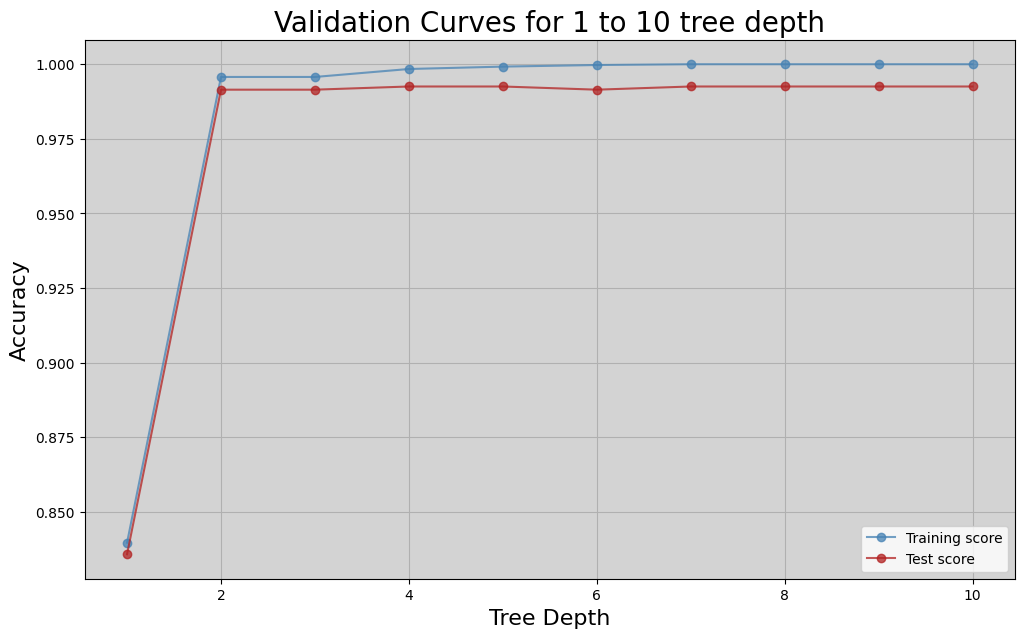

In [53]:
seed = 101
min_depth = 1
max_depth = 10
param_range = range(min_depth, max_depth + 1)
x_label = 'Tree Depth'
y_label = 'Accuracy'
title = "Validation Curves for {0} to {1} tree depth".format(min_depth, max_depth)

train_scores, test_scores = validation_curve(seed, X, Y, min_depth, max_depth+1)

figure = plt.figure(figsize=(12,7))
axes = figure.add_subplot(1, 1, 1)
axes.plot(param_range, train_scores, 'o-', color="steelblue", alpha=0.75, label="Training score")
axes.plot(param_range, test_scores, "o-", color="firebrick", alpha=0.75, label="Test score")
axes.set_facecolor("lightgrey")
axes.set_xlabel(x_label, size=16)
axes.set_ylabel(y_label, size=16)
axes.set_title(title, size=20)
plt.grid(True)
plt.legend(loc="best")
plt.show()
plt.close()

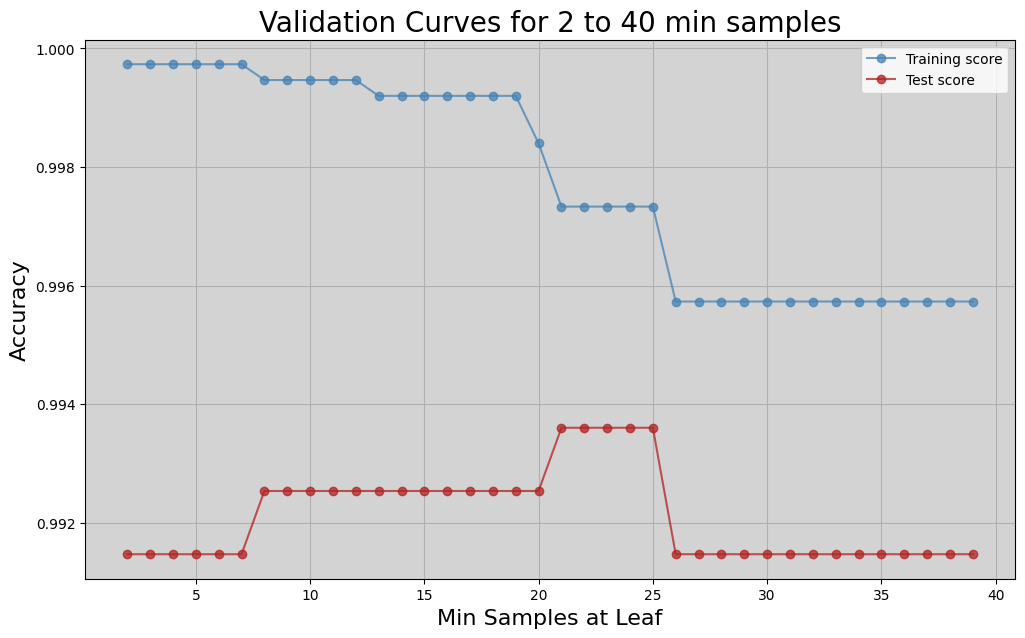

In [54]:
seed = 101
min_samples_split = 2
max_samples_split = 40
param_range = range(min_samples_split, max_samples_split, 1)
x_label = 'Min Samples at Leaf'
y_label = 'Accuracy'
title = "Validation Curves for {0} to {1} min samples".format(min_samples_split, max_samples_split)

train_scores, test_scores = validation_curve(seed, X, Y, min_samples_split, max_samples_split, countBy=1, feat='min_samples_split')

figure = plt.figure(figsize=(12,7))
axes = figure.add_subplot(1, 1, 1)
axes.plot(param_range, train_scores, 'o-', color="steelblue", alpha=0.75, label="Training score")
axes.plot(param_range, test_scores, "o-", color="firebrick", alpha=0.75, label="Test score")
axes.set_facecolor("lightgrey")
axes.set_xlabel(x_label, size=16)
axes.set_ylabel(y_label, size=16)
axes.set_title(title, size=20)
plt.grid(True)
plt.legend(loc="best")
plt.show()
plt.close()

In [55]:
validation_size = 0.20
seed = 7
scoring = 'accuracy'
kfold = 10

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

models = []
models.append(('gradient', GradientBoostingClassifier()))
models.append(('forest', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier(max_depth=6, min_samples_split=4)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

gradient: 0.995467 (0.002933)
forest: 0.995733 (0.002444)
CART: 0.995466 (0.002679)


In [56]:
# it is not reasonable to run 1000 k-folds, but it is reasonable to sample the 10 we did run to generate a baysian statistical confidence interval
def bootstrap_sample( data, f, n=1000):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)


# bootstrapped distributions
gradient_posterior = bootstrap_sample( results[0], np.mean, 1000)
CART_posterior = bootstrap_sample( results[2], np.mean, 1000)

# diff
difference = gradient_posterior - CART_posterior

# confidence intervals
print( "x1 90% BIC:", stats.mstats.mquantiles( gradient_posterior, [0.05, 0.95]))
print( "x2 90% BIC:", stats.mstats.mquantiles( CART_posterior, [0.05, 0.95]))
print( "difference 90% BIC", stats.mstats.mquantiles( difference, [0.05, 0.95]))

# ROPE (Region of Practical Equivalance)
# ROPE - given a percentage (0 to 100), to the precision of 0.1%, is it likely the difference between the two is actually different? 
np.mean((-.001 <= difference) & (difference <= 0.001))

x1 90% BIC: [0.993976   0.99695733]
x2 90% BIC: [0.99413262 0.9968    ]
difference 90% BIC [-0.00186667  0.00213333]


0.551

In [57]:
np.mean((-.005 <= difference) & (difference <= 0.005))

1.0

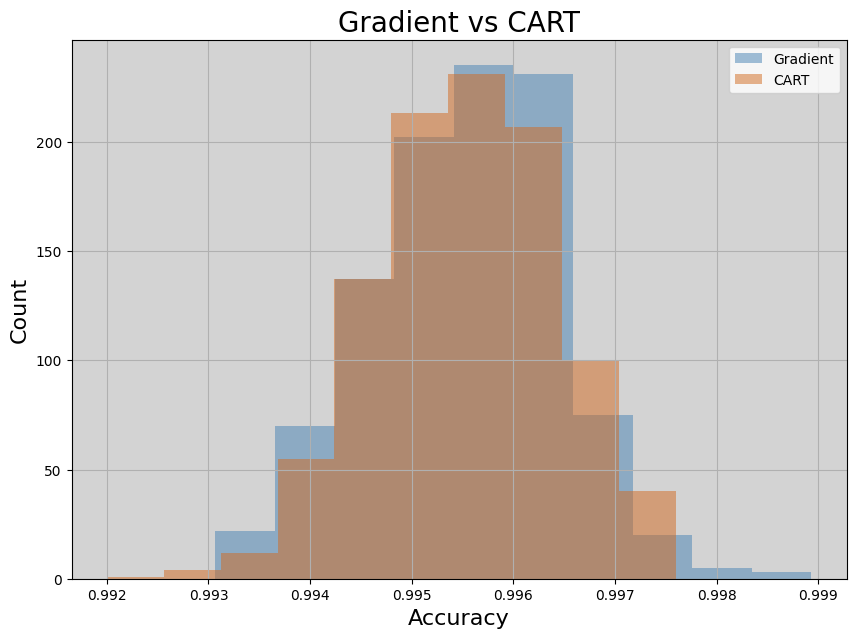

In [58]:
posterior_df = pd.DataFrame({'Gradient':gradient_posterior, 'CART':CART_posterior})
plotHistogram(posterior_df['Gradient'], xLabel = 'Accuracy', title = 'Gradient vs CART', secondVar = posterior_df['CART'], legendLabel=['Gradient', 'CART'])

In [59]:
# 3 x 3 x 3 = 27 combinations
gridPara = {'n_estimators':[10, 100, 200],
           'min_samples_split':[4, 8, 12],
           'max_depth':[3, 4, 5, 6]}

forest = GridSearchCV(RandomForestClassifier(), gridPara, cv=5)
forest.fit(X,Y)

gridResults = pd.DataFrame(forest.cv_results_)
gridResults = gridResults.sort_values('rank_test_score')
gridResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.267069,0.003054,0.006160,0.000122,5,4,100,"{'max_depth': 5, 'min_samples_split': 4, 'n_es...",0.995736,0.990405,0.997866,0.995731,0.996798,0.995307,0.002575,1
28,0.279802,0.002613,0.006389,0.000201,6,4,100,"{'max_depth': 6, 'min_samples_split': 4, 'n_es...",0.996802,0.991471,0.996798,0.994664,0.996798,0.995307,0.002088,2
34,0.285690,0.004211,0.006497,0.000134,6,12,100,"{'max_depth': 6, 'min_samples_split': 12, 'n_e...",0.995736,0.989339,0.998933,0.994664,0.996798,0.995094,0.003205,3
29,0.567130,0.004651,0.012675,0.000359,6,4,200,"{'max_depth': 6, 'min_samples_split': 4, 'n_es...",0.995736,0.990405,0.996798,0.995731,0.996798,0.995094,0.002392,4
26,0.534293,0.002249,0.011808,0.000035,5,12,200,"{'max_depth': 5, 'min_samples_split': 12, 'n_e...",0.993603,0.989339,0.998933,0.995731,0.996798,0.994881,0.003261,5


In [60]:
# 3 x 3 x 2 x 2 = 36 combinations
gridPara = {'learning_rate':[0.1, 0.2, 1], 
           'n_estimators':[10, 100, 200],
           'min_samples_split':[8, 12],
           'max_depth':[5, 6]}

gradient = GridSearchCV(GradientBoostingClassifier(), gridPara, cv=5)
gradient.fit(X,Y)

gridResults = pd.DataFrame(gradient.cv_results_)
gridResults = gridResults.sort_values('rank_test_score')
gridResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,3.103149,0.686224,0.004600,0.001319,0.1,6,12,200,"{'learning_rate': 0.1, 'max_depth': 6, 'min_sa...",0.998934,0.994670,0.997866,0.995731,1.000000,0.997440,0.001978,1
1,1.318249,0.084270,0.002290,0.000110,0.1,5,8,100,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa...",0.998934,0.994670,0.997866,0.995731,1.000000,0.997440,0.001978,1
25,0.589129,0.083337,0.001415,0.000098,1,5,8,100,"{'learning_rate': 1, 'max_depth': 5, 'min_samp...",0.998934,0.994670,0.997866,0.995731,1.000000,0.997440,0.001978,1
12,0.108616,0.007975,0.000654,0.000039,0.2,5,8,10,"{'learning_rate': 0.2, 'max_depth': 5, 'min_sa...",0.998934,0.995736,0.997866,0.995731,0.998933,0.997440,0.001447,4
33,0.160101,0.009400,0.000734,0.000023,1,6,12,10,"{'learning_rate': 1, 'max_depth': 6, 'min_samp...",0.998934,0.992537,0.996798,0.997866,1.000000,0.997227,0.002576,5


In [61]:
# --- Cross Validation --- 
validation_size = 0.20
seed = 7
scoring = 'accuracy'
kfold = 10

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

models = []
models.append(('CART', DecisionTreeClassifier(max_depth=6, min_samples_split=4)))

# evaluate each model in turn
results = []
names = []

kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg, '\n')

# --- Final Model ---
CART = DecisionTreeClassifier(max_depth=6, min_samples_split=4)

CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print('Single Fold Validation Score:', accuracy_score(Y_validation, predictions))

CART: 0.995733 (0.002719) 

Single Fold Validation Score: 0.9989339019189766


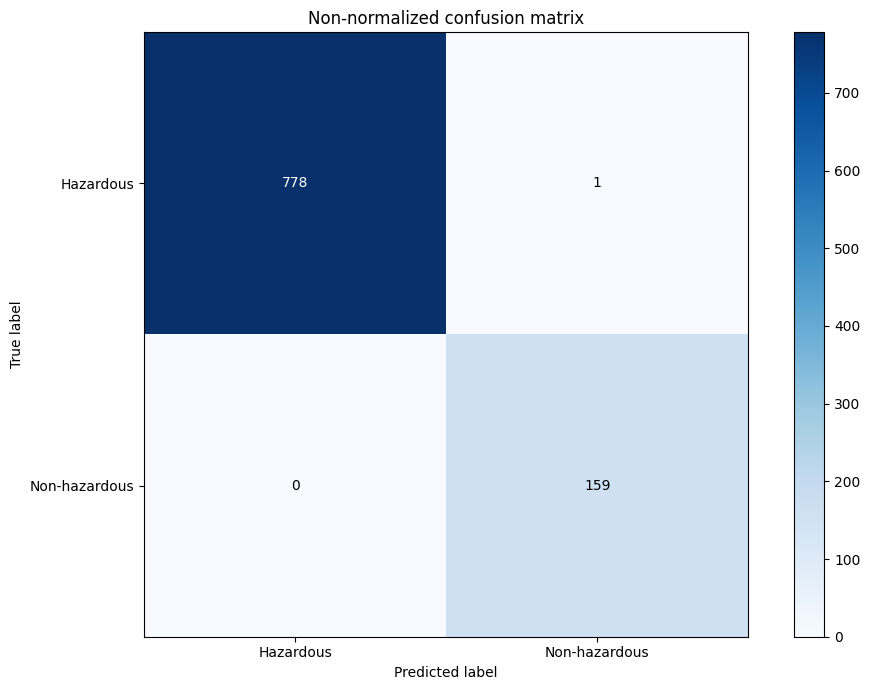

In [62]:
#plot non normalized confusion matrix
cmap = plt.cm.Blues
cm = confusion_matrix(Y_validation, predictions)
# add this line for normalized confusion:
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
classes = ['Hazardous', 'Non-hazardous']
title = 'Non-normalized confusion matrix'
fmt = 'd' #make this .2f for normalize

fig, ax = plt.subplots(figsize = (10,7))
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title=title,
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

plt.show()

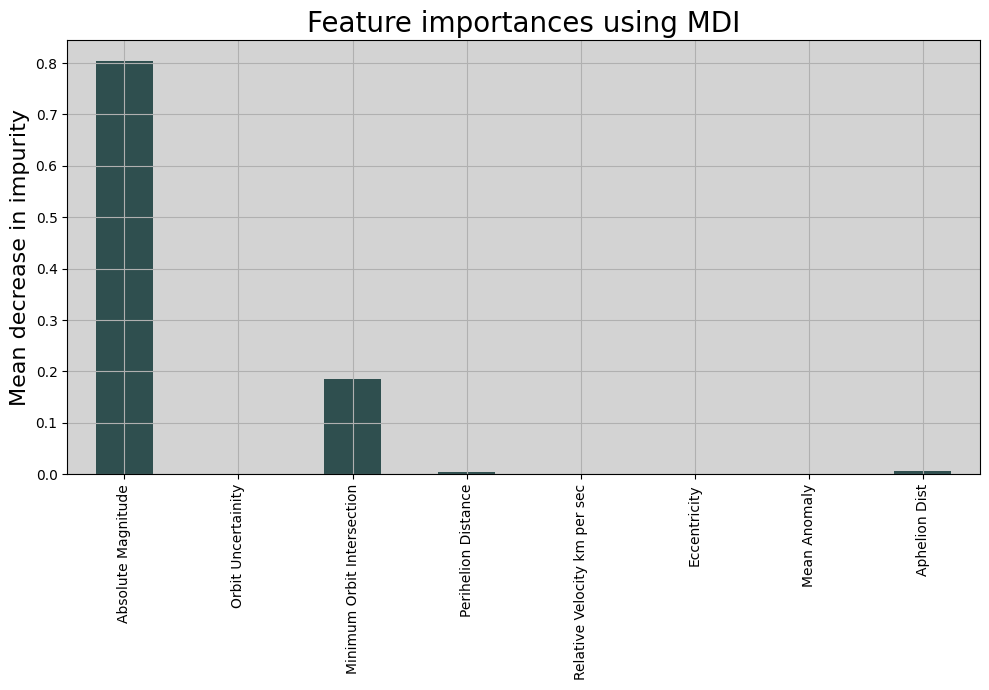

In [63]:
importances = CART.feature_importances_
# std = np.std([tree.feature_importances_ for tree in cart.feature_names_in_], axis=0)

feature_names = ['Absolute Magnitude', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Perihelion Distance', 'Relative Velocity km per sec', 'Eccentricity', 'Mean Anomaly', 'Aphelion Dist']
cart_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize = (10,7))
cart_importances.plot.bar(ax=ax, color="darkslategray")
ax.set_title("Feature importances using MDI", size=20)
ax.set_ylabel("Mean decrease in impurity", size=16)
ax.set_facecolor("lightgrey")
plt.grid(True)


fig.tight_layout()